In [1]:
#! pip cache purge

In [2]:
#pip install --upgrade pip

In [3]:

#! pip install scikit-learn

In [4]:
# A Machine Learning classification problem to predict Bike purchase 

#Import Libaries 
import numpy as np
import pandas as pd
import seaborn as sns





In [5]:
# Define the file path
file_path = r'C:\Users\User\Downloads\Excel Project Dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()



,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,M,M,30000.0,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,M,M,80000.0,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,S,M,70000.0,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,S,M,30000.0,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [6]:
# List of columns to convert to float
columns_to_convert =  ['Income']
# Convert specified columns to float
df[columns_to_convert] = df[columns_to_convert].astype(float)

# Display the DataFrame after conversion
print("\nDataFrame after converting specified columns to float:")
print(df.head())
print("\nData types of the DataFrame:")
print(df.dtypes)


DataFrame after converting specified columns to float:
      ID Marital Status Gender   Income  Children        Education   
0  12496              M      F  40000.0         1        Bachelors  \
1  24107              M      M  30000.0         3  Partial College   
2  14177              M      M  80000.0         5  Partial College   
3  24381              S      M  70000.0         0        Bachelors   
4  25597              S      M  30000.0         0        Bachelors   

       Occupation Home Owner  Cars Commute Distance   Region  Age   
0  Skilled Manual        Yes     0        0-1 Miles   Europe   42  \
1        Clerical        Yes     1        0-1 Miles   Europe   43   
2    Professional         No     2        2-5 Miles   Europe   60   
3    Professional        Yes     1       5-10 Miles  Pacific   41   
4        Clerical         No     0        0-1 Miles   Europe   36   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            

In [7]:
columns_to_remove = [0, 9]  # Example indices

# Remove columns by index
df = df.drop(df.columns[columns_to_remove], axis=1)

# Display the DataFrame after removing columns
print("\nDataFrame after removing columns at indices 0 and 9:")
df.head()


DataFrame after removing columns at indices 0 and 9:


,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Region,Age,Purchased Bike
0,M,F,40000.0,1,Bachelors,Skilled Manual,Yes,0,Europe,42,No
1,M,M,30000.0,3,Partial College,Clerical,Yes,1,Europe,43,No
2,M,M,80000.0,5,Partial College,Professional,No,2,Europe,60,No
3,S,M,70000.0,0,Bachelors,Professional,Yes,1,Pacific,41,Yes
4,S,M,30000.0,0,Bachelors,Clerical,No,0,Europe,36,Yes


In [8]:
df.shape
df.describe()

,Income,Children,Cars,Age
count,1026.000000,1026.000000,1026.000000,1026.000000
mean,56208.576998,1.892788,1.437622,44.138402
std,31293.284007,1.626670,1.125538,11.349282
min,10000.000000,0.000000,0.000000,25.000000
25%,30000.000000,0.000000,1.000000,35.000000
50%,60000.000000,2.000000,1.000000,43.000000
75%,70000.000000,3.000000,2.000000,52.000000
max,170000.000000,5.000000,4.000000,89.000000


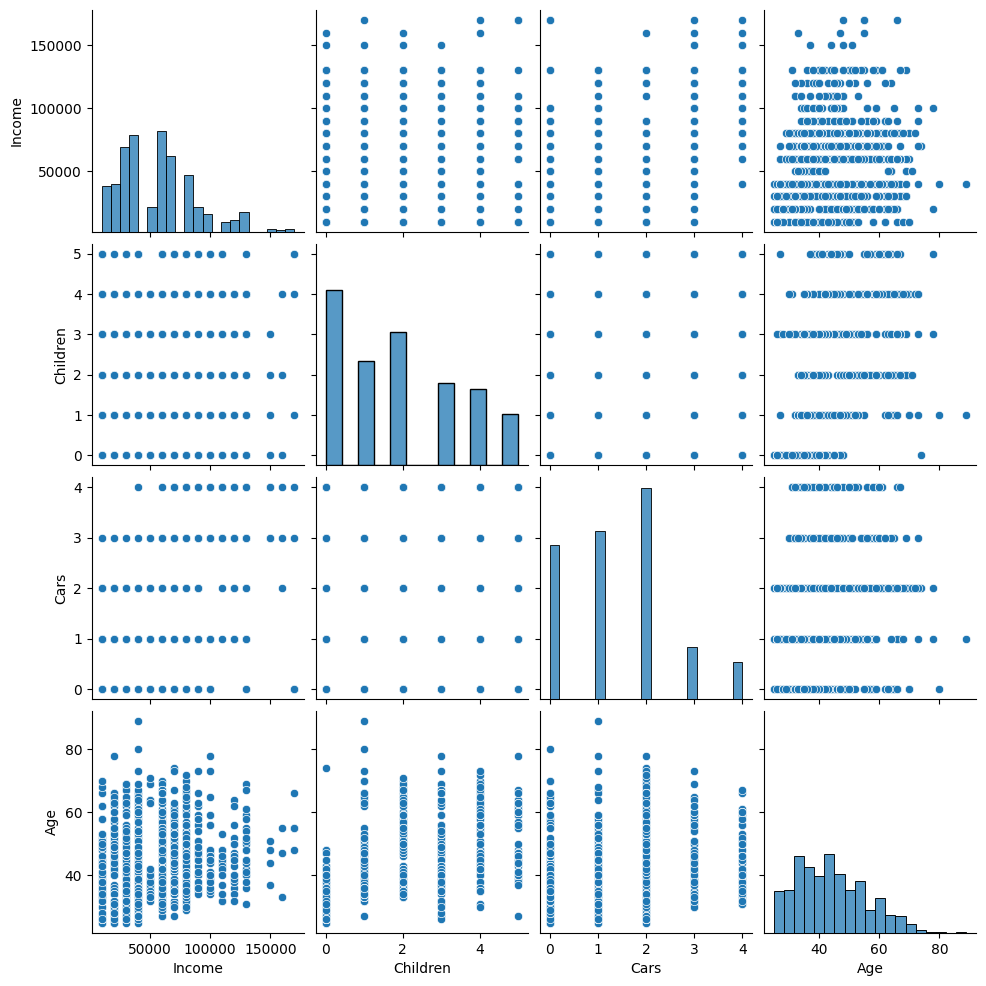

In [9]:
sns.pairplot(df)


In [10]:
columns = df.columns

# Optionally, convert the columns to a list
columns_list = columns.tolist()

# Display the list of columns
print("\nList of columns in the dataset:")
print(columns_list)


List of columns in the dataset:
['Marital Status', 'Gender', 'Income', 'Children', 'Education', 'Occupation', 'Home Owner', 'Cars', 'Region', 'Age', 'Purchased Bike']


In [11]:
# List of string columns to convert to float
columns_to_convert = ['Income']
# Convert specified string columns to float
for col in columns_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Display the DataFrame after conversion
print("\nDataFrame after converting specified string columns to float:")
print(df.head())

# Display the data types of the DataFrame

print(df.dtypes)


DataFrame after converting specified string columns to float:
  Marital Status Gender   Income  Children        Education      Occupation   
0              M      F  40000.0         1        Bachelors  Skilled Manual  \
1              M      M  30000.0         3  Partial College        Clerical   
2              M      M  80000.0         5  Partial College    Professional   
3              S      M  70000.0         0        Bachelors    Professional   
4              S      M  30000.0         0        Bachelors        Clerical   

  Home Owner  Cars   Region  Age Purchased Bike  
0        Yes     0   Europe   42             No  
1        Yes     1   Europe   43             No  
2         No     2   Europe   60             No  
3        Yes     1  Pacific   41            Yes  
4         No     0   Europe   36            Yes  
Marital Status     object
Gender             object
Income            float64
Children            int64
Education          object
Occupation         object
Home O

In [12]:
# List of categorical columns
categorical_columns = ['Marital Status', 'Gender', 'Education', 'Occupation', 'Home Owner', 'Region', 'Purchased Bike']

# Ensure the columns to be encoded exist in the DataFrame
missing_columns = [col for col in categorical_columns if col not in df.columns]

if missing_columns:
    print(f"The following columns are missing from the DataFrame: {missing_columns}")
else:
    # Convert specified columns to object type (if not already)
    for col in categorical_columns:
        df[col] = df[col].astype('object')

    # Apply one-hot encoding to the categorical columns
    df= pd.get_dummies(df, columns=categorical_columns)

    # Convert any boolean columns to integer
    df = df.astype(int)

    # Display the DataFrame after encoding
    print("\nDataFrame after one-hot encoding and boolean to integer conversion:")
df.head()



DataFrame after one-hot encoding and boolean to integer conversion:


,Income,Children,Cars,Age,Marital Status_M,Marital Status_S,Gender_F,Gender_M,Education_Bachelors,Education_Graduate Degree,...,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Home Owner_No,Home Owner_Yes,Region_Europe,Region_North America,Region_Pacific,Purchased Bike_No,Purchased Bike_Yes
0,40000,1,0,42,1,0,1,0,1,0,...,0,0,1,0,1,1,0,0,1,0
1,30000,3,1,43,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,80000,5,2,60,1,0,0,1,0,0,...,0,1,0,1,0,1,0,0,1,0
3,70000,0,1,41,0,1,0,1,1,0,...,0,1,0,0,1,0,0,1,0,1
4,30000,0,0,36,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


In [13]:
columns = df.columns

# Optionally, convert the columns to a list
columns_list = columns.tolist()

# Display the list of columns
print("\nList of columns in the dataset:")
print(columns_list)


List of columns in the dataset:
['Income', 'Children', 'Cars', 'Age', 'Marital Status_M', 'Marital Status_S', 'Gender_F', 'Gender_M', 'Education_Bachelors', 'Education_Graduate Degree', 'Education_High School', 'Education_Partial College', 'Education_Partial High School', 'Occupation_Clerical', 'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional', 'Occupation_Skilled Manual', 'Home Owner_No', 'Home Owner_Yes', 'Region_Europe', 'Region_North America', 'Region_Pacific', 'Purchased Bike_No', 'Purchased Bike_Yes']


In [14]:
feature_columns = ['Income', 'Children', 'Cars', 'Age', 'Marital Status_M', 'Marital Status_S', 'Gender_F', 'Gender_M', 'Education_Bachelors', 'Education_Graduate Degree', 'Education_High School', 'Education_Partial College', 'Education_Partial High School', 'Occupation_Clerical', 'Occupation_Management', 'Occupation_Manual', 'Occupation_Professional', 'Occupation_Skilled Manual', 'Home Owner_No', 'Home Owner_Yes', 'Region_Europe', 'Region_North America', 'Region_Pacific']  # Example feature columns
target_column =['Purchased Bike_Yes']

X = df[feature_columns]
y = df[target_column]
print(X.shape)
print(y.shape)

(1026, 23)
(1026, 1)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_selection\_rfe.py:299: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X[:, features], y, **fit_params)
c:\Users\User\AppData\Local\Programs\Python\Python311\L

(1026, 14)
(1026, 1)


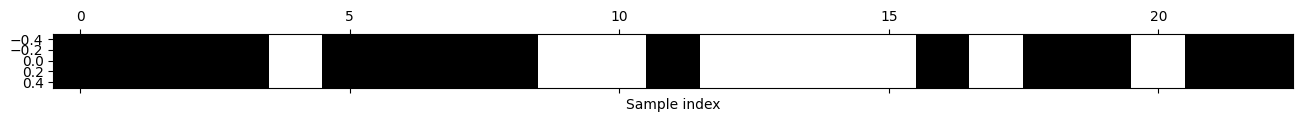

In [15]:
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
 n_features_to_select=14)
select.fit(X, y)
# visualize the selected features:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

X = select.transform(X)
print(X.shape)
print(y.shape)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
# List of classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": MLPClassifier(max_iter=500)

}
# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Logistic Regression Results:
Accuracy: 0.6019417475728155
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.72      0.64       103
           1       0.63      0.49      0.55       103

    accuracy                           0.60       206
   macro avg       0.61      0.60      0.60       206
weighted avg       0.61      0.60      0.60       206

Confusion Matrix:
 [[74 29]
 [53 50]]

Decision Tree Results:
Accuracy: 0.6601941747572816
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.72      0.68       103
           1       0.68      0.60      0.64       103

    accuracy                           0.66       206
   macro avg       0.66      0.66      0.66       206
weighted avg       0.66      0.66      0.66       206

Confusion Matrix:
 [[74 29]
 [41 62]]


C:\Users\User\AppData\Local\Temp\ipykernel_9960\1485722482.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_scaled, y_train)



Random Forest Results:
Accuracy: 0.7038834951456311
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.73      0.71       103
           1       0.71      0.68      0.70       103

    accuracy                           0.70       206
   macro avg       0.70      0.70      0.70       206
weighted avg       0.70      0.70      0.70       206

Confusion Matrix:
 [[75 28]
 [33 70]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Gradient Boosting Results:
Accuracy: 0.6310679611650486
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       103
           1       0.64      0.61      0.62       103

    accuracy                           0.63       206
   macro avg       0.63      0.63      0.63       206
weighted avg       0.63      0.63      0.63       206

Confusion Matrix:
 [[67 36]
 [40 63]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Machine Results:
Accuracy: 0.6310679611650486
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.68      0.65       103
           1       0.65      0.58      0.61       103

    accuracy                           0.63       206
   macro avg       0.63      0.63      0.63       206
weighted avg       0.63      0.63      0.63       206

Confusion Matrix:
 [[70 33]
 [43 60]]

K-Nearest Neighbors Results:
Accuracy: 0.6067961165048543
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.60      0.60       103
           1       0.61      0.61      0.61       103

    accuracy                           0.61       206
   macro avg       0.61      0.61      0.61       206
weighted avg       0.61      0.61      0.61       206

Confusion Matrix:
 [[62 41]
 [40 63]]

Naive Bayes Results:
Accuracy: 0.6601941747572816


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.73      0.68       103
           1       0.69      0.59      0.64       103

    accuracy                           0.66       206
   macro avg       0.66      0.66      0.66       206
weighted avg       0.66      0.66      0.66       206

Confusion Matrix:
 [[75 28]
 [42 61]]

AdaBoost Results:
Accuracy: 0.6844660194174758
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68       103
           1       0.68      0.69      0.69       103

    accuracy                           0.68       206
   macro avg       0.68      0.68      0.68       206
weighted avg       0.68      0.68      0.68       206

Confusion Matrix:
 [[70 33]
 [32 71]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Neural Network Results:
Accuracy: 0.6262135922330098
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.69      0.65       103
           1       0.64      0.56      0.60       103

    accuracy                           0.63       206
   macro avg       0.63      0.63      0.62       206
weighted avg       0.63      0.63      0.62       206

Confusion Matrix:
 [[71 32]
 [45 58]]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


RRADIENT BOOSTING ALGORITHS PROVIDED THE BEST PREDICTIVE PERFORMANCE OF 67%

FUTURE RECOMMENDATION 
